# Summary: AdaBoost
Used in non linearly separable data
Iteratively building a weighted sum of weak classifiers

In [5]:
# good to import few packages
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [8]:
def display_digit(image, label, training_or_inferred = "training"):
    """
    graphically display a 784x1 vector, representing a digit, and show the corresponding label

    """

    plt.figure()
    fig = plt.imshow(image.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    if training_or_inferred == "training":
        title_str = "GT label: "
    else:
        title_str = "Inferred label: "
    plt.title(title_str  + str(int(label)))

def display_vector(vector):
    """
    graphically display a 784x1 vector, representing a digit, without showing the label

    """

    plt.figure()
    fig = plt.imshow(vector.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)


In [9]:
# load the dataset
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

train_data = np.loadtxt("../mnist_train.csv", delimiter=",")

# AdaBoost Algorithm

In [7]:
def fit(self,nit=10):
    # Initialize weights and list of classifiers
    self.weakCls = []
    bestAcc = 0.0
    self.datCoeffs = np.ones(self.ns,dtype=np.float)/self.ns
    # Find nit weak classifiers and update weights each time.
    for m in range(nit):
        weakC=self.getWeakC()
        self.weakCls.append(weakC)
        weakC.alpha=self.updateWeights(weakC)


def updateWeights(self,weakC):
    # Compute alpha
    err,_ = self.weakClassError(weakC)
    alpha = np.log(1.0/max(1e-10,err)-1.0)
    # Compute numbers of misclassified samples.
    nerrs = np.logical_not(weakC.predict(self.xs)==self.ys) # Update and normalize weights.
    self.datCoeffs *= np.exp(alpha*nerrs)
    self.datCoeffs /= sum (self.datCoeffs)
    return alpha

# Adaboost scheme
Note: The weakClassifiers don't have to be linear
Steps to be taken:
1. We itterate on the classifiers and then append the new classifier onto the set of classifiers to improve sum of classifiers
2. Updating the weights:
        2.1 We check for the error in the classification after the use of the last classifier
        2.2 Computing alpha as a minimization of the error we just recieved and use as the new weight
        2.3 Find all the misclassified samples and update their weights and normalize them

In [10]:
def fit(self,nit=10):
    # Initialize weights and list of classifiers
    self.weakCls = []
    bestAcc = 0.0
    self.datCoeffs = np.ones(self.ns,dtype=np.float)/self.ns
    # Find nit weak classifiers and update weights each time.
    for m in range(nit):
       weakC=self.getWeakC()
       self.weakCls.append(weakC)
       weakC.alpha=self.updateWeights(weakC)

def updateWeights(self,weakC):
    # Compute alpha
    err,_ = self.weakClassError(weakC)
    alpha = np.log(1.0/max(1e-10,err)-1.0)
    # Compute numbers of misclassified samples.
    nerrs = np.logical_not(weakC.predict(self.xs)==self.ys) # Update and normalize weights.
    self.datCoeffs *= np.exp(alpha*nerrs)
    self.datCoeffs /= sum (self.datCoeffs)
    return alpha

# SVMs
Similar to how AdaBoost works it utilises weaker weights to improve on the current values

# From a linear SVM to a polynomial SVM
$$
\mathbf{w}^{*}=\min _{\left(\mathbf{w},\left\{\xi_{n}\right\}\right)} \frac{1}{2}\left\|\mathbf{w}^{2}\right\|+C \sum_{n=1}^{N} \xi_{n},
$$
subject to $\forall n, \quad t_{n} \cdot\left(\tilde{\mathbf{w}} \cdot \mathbf{x}_{n}\right) \geq 1-\xi_{n}$ and $\xi_{n} \geq 0$.

We do this to be able change the $x_{n}$ for the transformation into a higher dimension $\phi(\mathbf{x}_{n})$ function that maps $x_{n}$ to a higher dimension.
Aka:

$$
\mathbf{w}^{*}=\min _{\left(\mathbf{w},\left\{\xi_{\mathbf{n}}\right\}\right)} \frac{1}{2}\|\mathbf{w}\|^{2}+C \sum_{n=1}^{N} \xi_{n} \text {, }
$$
subject to $\forall n, \quad t_{n} \cdot\left(\tilde{\mathbf{w}} \cdot \phi\left(\mathbf{x}_{n}\right)\right) \geq 1-\xi_{n}$ and $\xi_{n} \geq 0$.

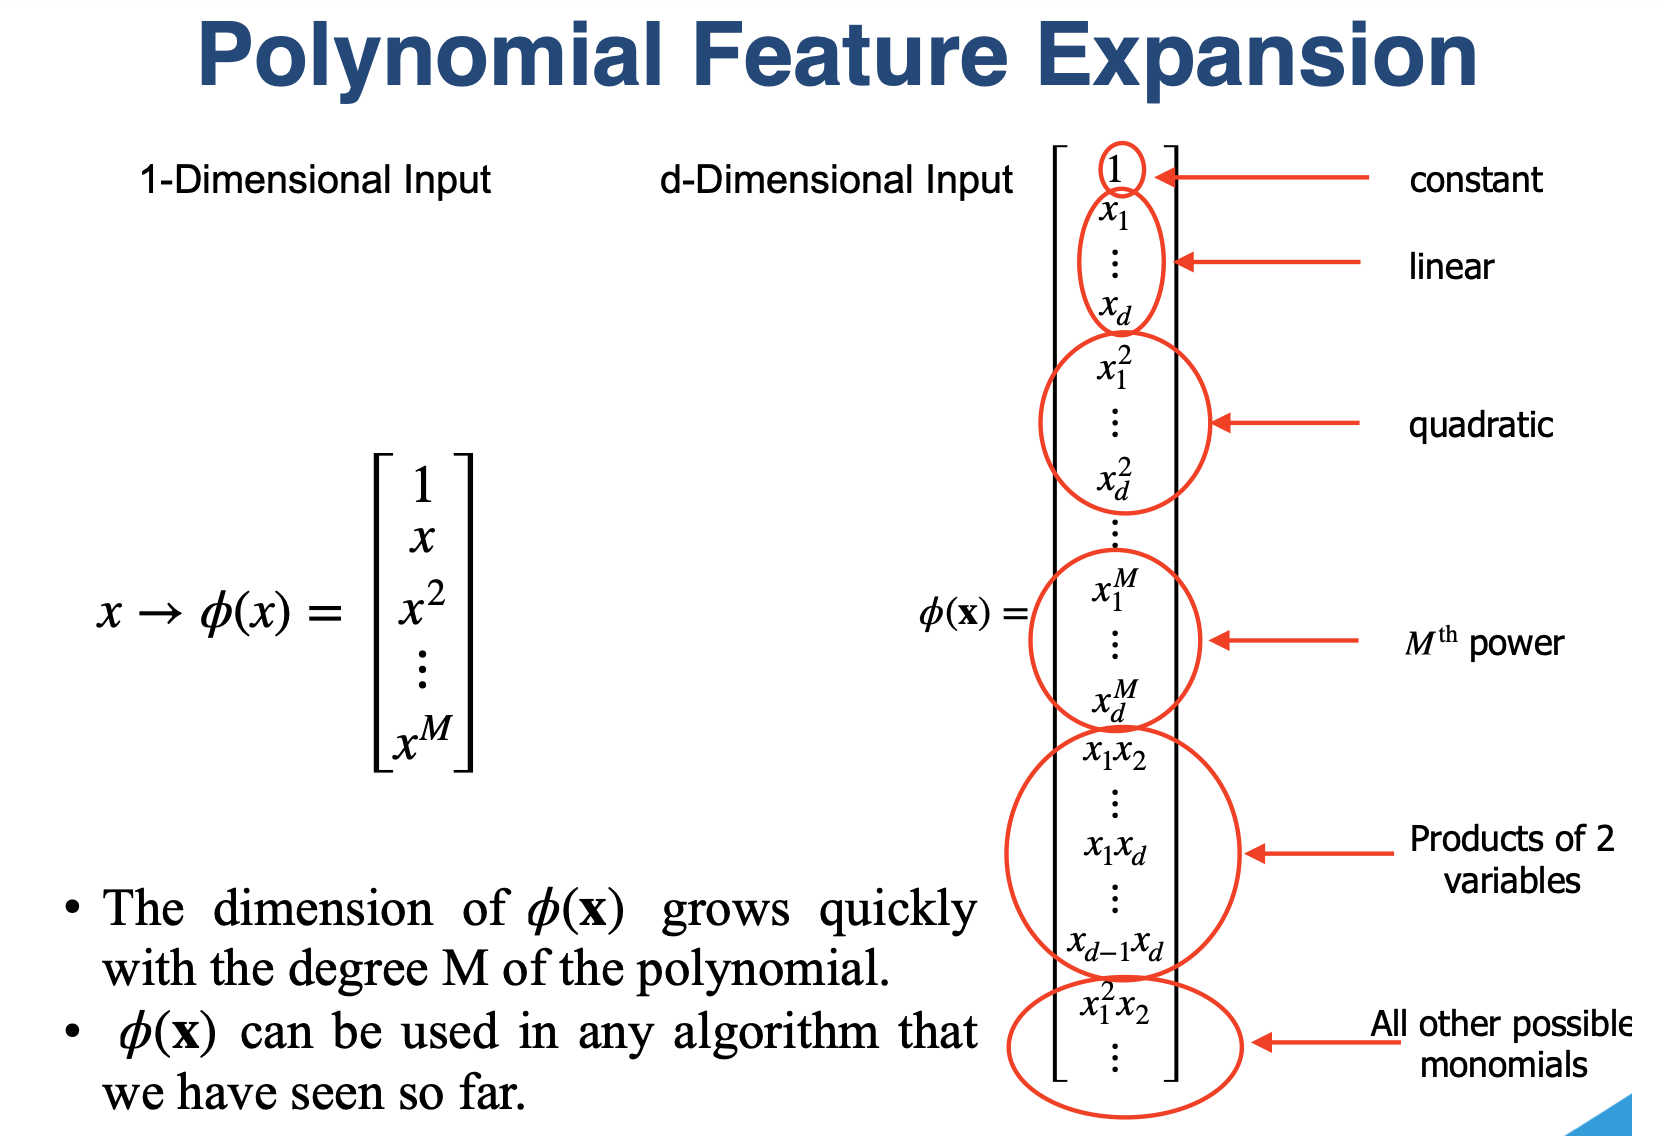

In [4]:
from IPython import display
display.Image("./Summary/Polynomial_Feature_Expansion.png")

# Multi-Layered Perceptrons
